In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
!pip install spafe
!pip install matplotx[all]
!pip install praat-parselmouth
!pip install textstat
!pip install pocketsphinx
!pip install git+https://github.com/m-bain/whisperx.git

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/speech_analysis")

In [ ]:
import librosa
import numpy as np
import matplotx
import matplotlib.pyplot as plt


from process_file import process_file, process_file_model

In [ ]:
from loudness_and_intensity import *
from complexity import *
from voice_quality import *
from helper import *
from frequency_parameters import *
from spectral_domain import *
from speech_behavior import *

In [ ]:
# from matplotlib import rc
# rc('text', usetex=False)
# plt.rcParams['font.family'] = 'Arial'


In [ ]:

cn_audio_path = "/content/019.wav"

In [ ]:
ad_audio_path = "adrso244_1.wav"
cn_audio_path = "adrso019_0.wav"
# cn_audio_path = "/content/a.wav"

# cn_audio_path = "/content/gdrive/MyDrive/Data/2021/Audio-denoise&&subject_new/train_data_2021/CN-denoise/adrso019.wav"

window_length_ms = 50
window_step_ms = 25
fs = 16000


# window_length_ms = 50
# window_step_ms = 5

ad_data, ad_fs = librosa.load(ad_audio_path, sr=fs)
ad_time_range = np.arange(len(ad_data)) / ad_fs
cn_data, cn_fs = librosa.load(cn_audio_path, sr=fs)
cn_time_range = np.arange(len(cn_data)) / cn_fs


In [ ]:
cn_data = cn_data[int(2.67* fs): int(8.87 * fs)]

In [ ]:
def plot(ad_data, ad_range, cn_data, cn_range, xlabel="Time (second)", ylabel="Amplitude", title=None, sentence=False, color=None, feature_name="fig"):
    if sentence:
        xlabel = f"{xlabel}\nSentence: \"Looks like he's gonna fall.\""

    if not title:z
        title1 = 'Not Cognitively Impaired (Control Group)'
        title2 = 'ADRD (Case Group)'
    else:
        title1 = title2 = title


    ulim = np.max([np.max(ad_data), np.max(cn_data)])
    llim = np.min([np.min(ad_data), np.min(cn_data), 0])
    # print(ulim, llim)
    ulim += (np.abs(ulim) / 5)
    llim -= (np.abs(llim) / 5)

    # print(ulim, llim)

    fig = plt.figure(figsize=(10, 6))

    ax2 = plt.subplot(222)
    ad_range = ad_range[:len(ad_data)]
    plt.plot(ad_range, ad_data, color=color)
    plt.title(title2, fontsize=9)
    plt.xlabel(xlabel, fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    _ = plt.yticks(fontsize=6, weight="bold")
    _ = plt.xticks(fontsize=6, weight="bold")

    plt.ylim(llim, ulim)
    # plt.grid(True)

    ax1 = plt.subplot(221)
    cn_range = cn_range[:len(cn_data)]
    plt.plot(cn_range, cn_data, color=color)
    plt.title(title1, fontsize=9)
    plt.xlabel(xlabel, fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    _ = plt.yticks(fontsize=6, weight="bold")
    _ = plt.xticks(fontsize=6, weight="bold")

    plt.ylim(llim, ulim)
    # plt.grid(True)
    plt.show()

    return fig


In [ ]:
import matplotlib.transforms as mtransforms

def save_fig(fig, path, box):
    fig.savefig(path, dpi=600, bbox_inches=mtransforms.Bbox(
            # input in [[xmin, ymin], [xmax, ymax]]
            box
        ).transformed(
            (fig.transFigure - fig.dpi_scale_trans)
        ),
    )

def save_both(fig, path, feature_name):
    left_box = [[0, 0], [0.48, 1]]
    right_box = box = [[0.48, 0], [1, 1]]

    save_fig(fig, f"{path}/cn_{feature_name}.png", box=left_box)
    save_fig(fig, f"{path}/ad_{feature_name}.png", box=right_box)



**Time Domain Signal**

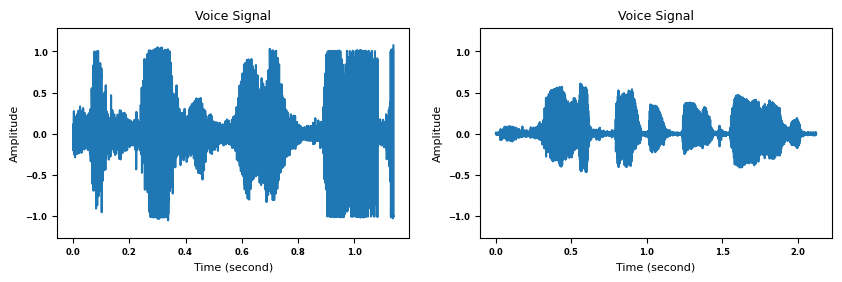

In [ ]:
fig = plot(ad_data, ad_time_range, cn_data, cn_time_range, sentence=False, title="Voice Signal")

save_both(fig, "/content/figures", "time_domain_sinal")

# Loudness and Intensity

In [ ]:
ad_RMS = rms_amplitude(ad_data, ad_fs, window_length_ms, window_step_ms)
ad_SPL = spl_per(ad_data, ad_fs, window_length_ms, window_step_ms)
ad_PEAK = peak_amplitude(ad_data, ad_fs, window_length_ms, window_step_ms)
ad_STE = ste_amplitude(ad_data, ad_fs, window_length_ms, window_step_ms)
ad_INTENSITY = intensity(ad_data, ad_fs, window_length_ms, window_step_ms)

ad_list = [ad_RMS, ad_SPL, ad_PEAK, ad_STE, ad_INTENSITY]

In [ ]:
cn_RMS = rms_amplitude(cn_data, ad_fs, window_length_ms, window_step_ms)
cn_SPL = spl_per(cn_data, ad_fs, window_length_ms, window_step_ms)
cn_PEAK = peak_amplitude(cn_data, ad_fs, window_length_ms, window_step_ms)
cn_STE = ste_amplitude(cn_data, ad_fs, window_length_ms, window_step_ms)
cn_INTENSITY = intensity(cn_data, ad_fs, window_length_ms, window_step_ms)

cn_list = [cn_RMS, cn_SPL, cn_PEAK, cn_STE, cn_INTENSITY]

In [ ]:
names = ["Root Mean Square Amplitue", "Sound Pressure Level", "Peak Amplitude", "Short Time Energy", "Intensity"]

In [ ]:
window_size = int(window_length_ms / 1000 * fs)
overlap = int((window_length_ms - window_step_ms) / 1000 * fs)

ad_time = np.arange(len(ad_RMS) + 5) * (window_size - overlap) / fs
cn_time = np.arange(len(cn_RMS) + 5) * (window_size - overlap) / fs

NameError: name 'ad_RMS' is not defined

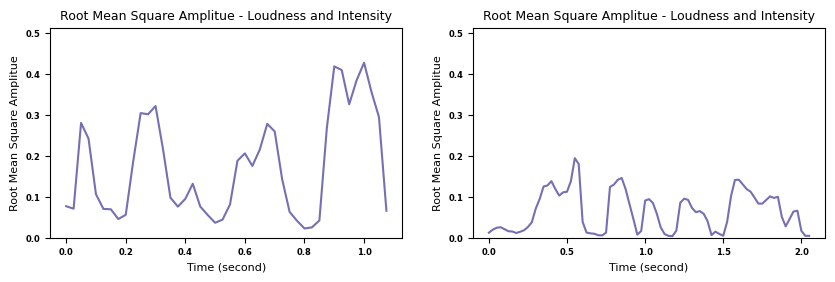

In [ ]:
for i, pair in enumerate(zip(ad_list[:1], cn_list[:1])):
    fig = plot(pair[0], ad_time, pair[1], cn_time, xlabel="Time (second)",
         ylabel=names[i], color="#7570b3", title=f"{names[i]} - Loudness and Intensity")



In [ ]:
save_both(fig, "/content/figures", "rms")

# Complexity

In [ ]:
ad_HFD = calculate_hfd_per_frame(ad_data, ad_fs, window_length_ms, window_step_ms, 10)
ad_FREQ_ENTROPY = calculate_frequency_entropy(ad_data, ad_fs, window_length_ms, window_step_ms)
ad_AMP_ENTROPY = calculate_amplitude_entropy(ad_data, ad_fs, window_length_ms, window_step_ms)

ad_list = [ad_HFD, ad_FREQ_ENTROPY, ad_AMP_ENTROPY]

In [ ]:
cn_HFD = calculate_hfd_per_frame(cn_data, cn_fs, window_length_ms, window_step_ms, 10)
cn_FREQ_ENTROPY = calculate_frequency_entropy(cn_data, cn_fs, window_length_ms, window_step_ms)
cn_AMP_ENTROPY = calculate_amplitude_entropy(cn_data, cn_fs, window_length_ms, window_step_ms)

cn_list = [cn_HFD, cn_FREQ_ENTROPY, cn_AMP_ENTROPY]

In [ ]:
ad_time = np.arange(len(ad_HFD) + 5) * (window_size - overlap) / fs
cn_time = np.arange(len(cn_HFD) + 5) * (window_size - overlap) / fs

In [ ]:
names = ["HFD", "Frequency Entropy", "Amplitude Entropy"]

In [ ]:
# for i, pair in enumerate(zip(ad_list, cn_list)):
#     plot(pair[0], ad_time, pair[1], cn_time, xlabel="Time (s)", ylabel=names[i])

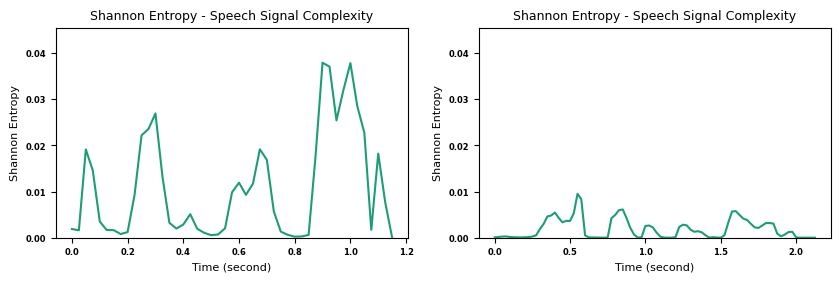

In [ ]:
fig = plot(ad_FREQ_ENTROPY, ad_time, cn_FREQ_ENTROPY, cn_time, xlabel="Time (second)",
     ylabel="Shannon Entropy", color="#1b9e77", title=f"Shannon Entropy - Speech Signal Complexity")

In [ ]:
save_both(fig, "/content/figures", "shannon_entropy")

# Voice Quality

In [ ]:
ad_SHIMMER = analyze_audio_shimmer(ad_data, ad_fs, window_length_ms, window_step_ms)
ad_HNR, ad_NHR = calculate_frame_level_hnr(ad_data, ad_fs, window_length_ms, window_step_ms)

ad_list = [ad_SHIMMER, ad_HNR, ad_NHR]

In [ ]:
cn_SHIMMER = analyze_audio_shimmer(cn_data, cn_fs, window_length_ms, window_step_ms)
cn_HNR, cn_NHR = calculate_frame_level_hnr(cn_data, cn_fs, window_length_ms, window_step_ms)

cn_list = [cn_SHIMMER, cn_HNR, cn_NHR]

In [ ]:
ad_time = np.arange(len(ad_SHIMMER) + 5) * (window_size - overlap) / fs
cn_time = np.arange(len(cn_SHIMMER) + 5) * (window_size - overlap) / fs

In [ ]:
names = ["SHIMMER", "Harmonic to Noise Ratio", "NHR (dB)"]

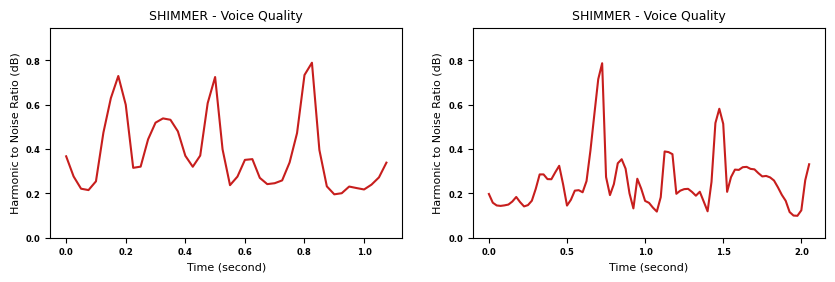

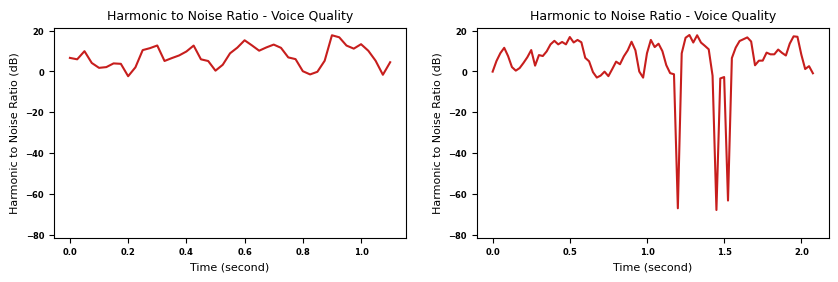

In [ ]:
for i, pair in enumerate(zip(ad_list[:2], cn_list[:2])):
    fig = plot(pair[0], ad_time, pair[1], cn_time,
         xlabel="Time (second)", ylabel=names[i],
         color="#c71e1d", title=f"{names[i]} - Voice Quality")

In [ ]:
save_both(fig, "/content/figures", "HNR")

# Spectral Domain

In [ ]:
import numpy
import matplotlib
matplotlib.rcParams.update({'font.size': 4})

def spec(data, fs):
    ad_F0 = get_pitch(data, fs, window_length_ms, window_step_ms)
    ad_F = get_formants_frame_based(data, fs, window_length_ms, window_step_ms, [1, 2, 3, 4])

    # nan_index = numpy.argwhere(numpy.isnan(ad_F0))
    # ad_F[:, nan_index] = numpy.nan

    ad_F1 = ad_F[0, :] / 1000
    ad_F2 = ad_F[1, :] / 1000
    ad_F3 = ad_F[2, :] / 1000
    ad_F4 = ad_F[3, :] / 1000
    ad_F0 = ad_F0 / 1000
    spectrogram = stft(data, fs, window_length_ms, window_step_ms)
    spectrogram = spectrogram.T
    import numpy as np
    import matplotlib.pyplot as plt

    window_size = int(window_length_ms / 1000 * fs)
    overlap = int((window_length_ms - window_step_ms) / 1000 * fs)

    # Plot the spectrogram
    frequencies = np.fft.rfftfreq(window_size, d=1.0/fs) / 1000
    time = np.arange(len(spectrogram[0])) * (window_size - overlap) / fs

    plt.rcParams["figure.figsize"] = (12, 5)


    plt.pcolormesh(time, frequencies, librosa.amplitude_to_db(np.abs(spectrogram),
                                                       ref=np.max))
    plt.xlabel("Time (s)", fontsize=8)
    plt.ylabel("Frequency (KHz)", fontsize=8)
    cbar = plt.colorbar(label="Power spectral density (dB/Hz)", location="left")
    cbar.ax.tick_params(labelsize=8)
    cbar.set_label('Power spectral density (dB/Hz)', fontsize=8)

    plt.ylim([0, fs/2000.])
    a = np.full((83, ), 1)
    time = time[0:len(ad_F0)]
    # lightgreen white

    colors = ['red', 'orange', 'yellow', 'cyan', '#fc03fc']
    colors = ['#00fcc6', 'white', 'yellow', 'cyan', '#fc03fc']

    # with plt.style.context(matplotx.styles.dufte):

    #     line1, = plt.plot(time, ad_F0,color="black", label="F0", linewidth=2)
    #     line2, = plt.plot(time, ad_F1,color="black",label="F1", linewidth=2)
    #     line3, = plt.plot(time, ad_F2,color="black",label="F2", linewidth=2)
    #     line4, = plt.plot(time, ad_F3,color="black",label="F3", linewidth=2)
    #     line5, = plt.plot(time, ad_F4,color="black", label="F4", linewidth=2)

    #     matplotx.line_labels(fontsize=8)  # line labels to the right
    #     line1.set_color(colors[0])
    #     line2.set_color(colors[1])
    #     line3.set_color(colors[2])
    #     line4.set_color(colors[3])
    #     line5.set_color(colors[4])



    _ = plt.yticks(fontsize=6, weight="bold")
    _ = plt.xticks(fontsize=6, weight="bold")

    # plt.legend()
    plt.savefig("/content/figures/spectrogram.png", dpi=600)
    plt.show()


In [ ]:
spec(cn_data, cn_fs)

In [ ]:
spec(ad_data, ad_fs)

**A pronunciation**

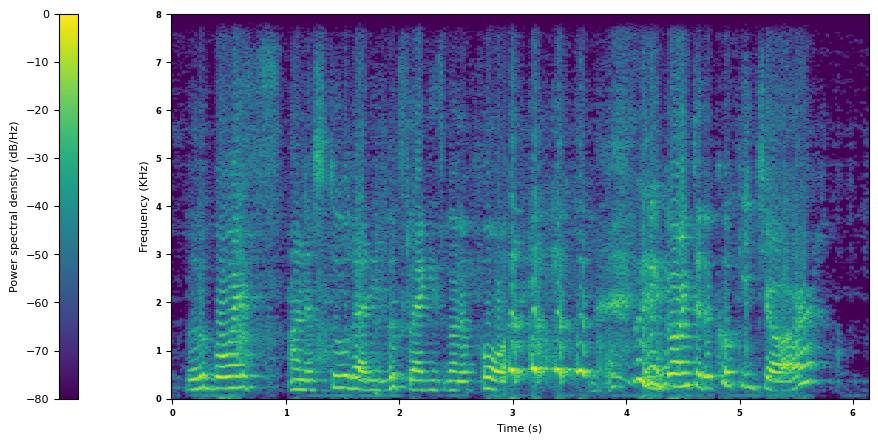

In [ ]:
spec(cn_data, cn_fs)

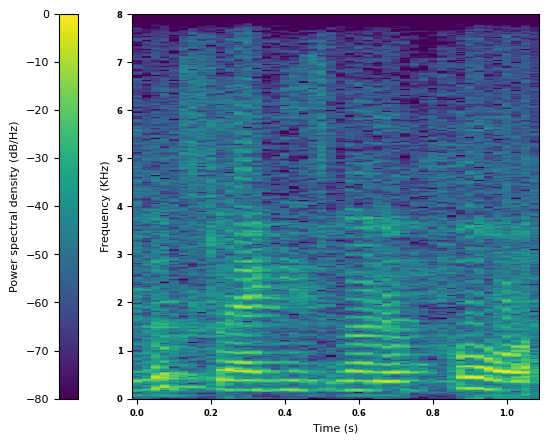

In [ ]:
spec(cn_data, cn_fs)

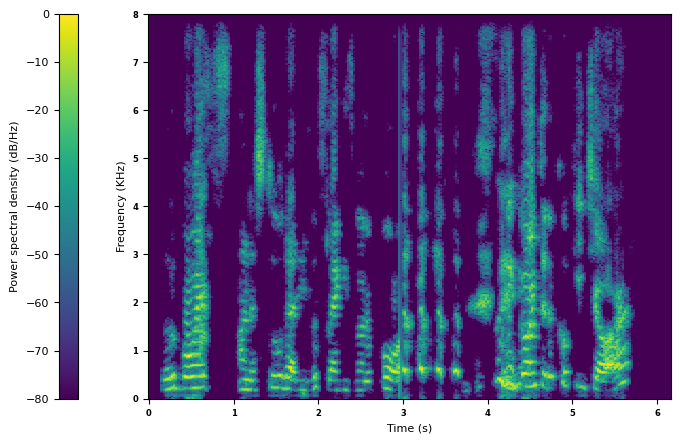

In [ ]:
spec(cn_data, cn_fs)

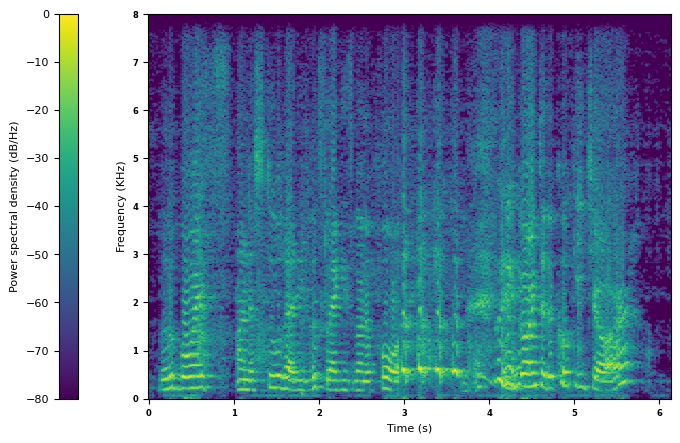

In [ ]:
spec(cn_data, cn_fs)

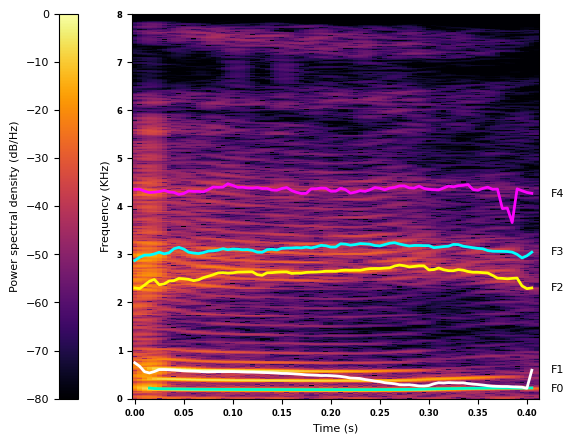

In [ ]:
spec(cn_data[int(0.05 * 16000): int(0.51 * 16000)], cn_fs)

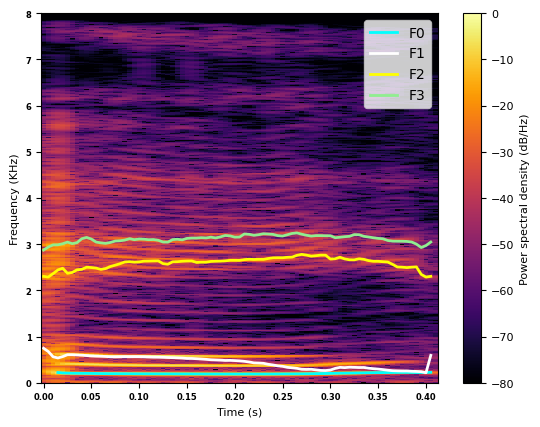

In [ ]:
spec(cn_data[int(0.05 * 16000): int(0.51 * 16000)], cn_fs)

**Long Term Average Spectrum**

In [ ]:
ad_LTAS, ad_freq = ltas(ad_data, ad_fs, window_length_ms, window_step_ms)
cn_LTAS, cn_freq = ltas(cn_data, cn_fs, window_length_ms, window_step_ms)

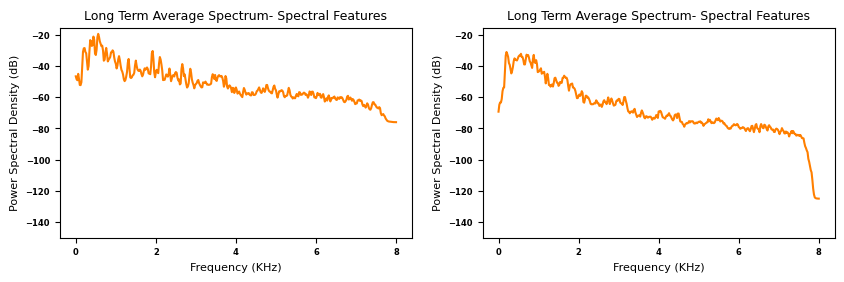

In [ ]:
fig = plot(ad_LTAS, ad_freq / 1000, cn_LTAS, cn_freq / 1000,
     xlabel="Frequency (KHz)", ylabel="Power Spectral Density (dB)", color="#ff7f00", title=f"Long Term Average Spectrum- Spectral Features")
save_both(fig, "/content/figures", "LTAS")

**MFCC**

# Vowel Duration

In [ ]:
import whisperx
import gc
import torch

torch.set_num_threads(1)

vad_model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True)

device = "cuda"
batch_size = 8 # reduce if low on GPU mem
compute_type = "float16" # change to "int8" if low on GPU mem (may reduce accuracy)

# 1. Transcribe with original whisper (batched)
transcription_model = whisperx.load_model("large-v3", device, compute_type=compute_type)

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /root/.cache/torch/hub/master.zip


model.bin:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

vocabulary.json:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

No language specified, language will be first be detected for each audio file (increases inference time).


100%|█████████████████████████████████████| 16.9M/16.9M [00:02<00:00, 8.58MiB/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.2.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../../root/.cache/torch/whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.2.1+cu121. Bad things might happen unless you revert torch to 1.x.


In [ ]:
path = cn_audio_path

speech_behavior = SpeechBehavior(vad_model, utils, transcription_model)
speech_behavior.configure(path)

speech_behavior.transcription_result["segments"][0]["words"].pop(0)
speech_behavior.transcription_result["segments"][0]["text"] = "looks like he's gonna fall."

alignment_error = speech_behavior.phoneme_alignment(path)
alignment_error

Detected language: en (0.99) in first 30s of audio...


(1, 0)

In [ ]:
vowel_sounds = {'AA', 'AE', 'AH', 'AO', 'AW', 'AY', 'EH', 'ER', 'EY', 'IH', 'IY', 'OW', 'OY', 'UH', 'UW'}

for word in speech_behavior.all_phonemes:
    for phone in word["phonemes"]:
        if phone["name"] in vowel_sounds:
            vwl_dur = (phone["end"] - phone["start"])
            print(f'"{phone["name"]}": {vwl_dur}')

"UH": 0.03
"AY": 0.09999999999999998
"IY": 0.03999999999999998
"AA": 0.06000000000000005
"AH": 0.06000000000000005
"AA": 0.06999999999999995


In [ ]:
ad = {
    "UH": 0.05500000000000005,
"AY": 0.06000000000000005,
"IY": 0.04800000000000004,
"AA": 0.07099999999999995,
"AH": 0.07000000000000006,
"AO": 0.11499999999999999
}

In [ ]:
cn = {
    "UH": 0.03,
"AY": 0.09999999999999998,
"IY": 0.03999999999999998,
"AA": 0.06000000000000005,
"AH": 0.06000000000000005,
"AO": 0.06999999999999995
}

(6,) 6 6


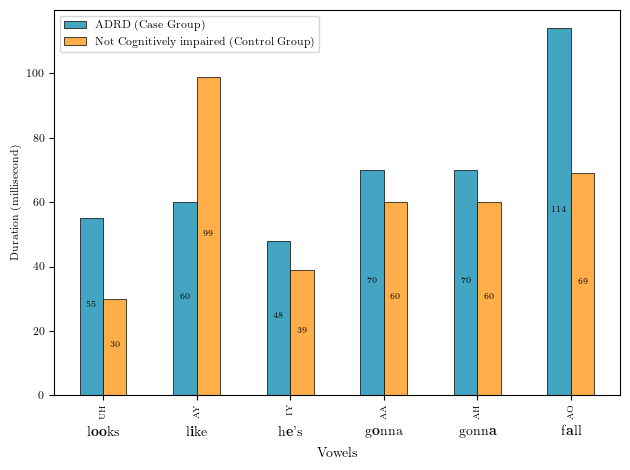

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(6)

values1 = np.array(list(ad.values())) * 1000
values3 = np.array(list(cn.values())) * 1000

values1 = values1.astype(np.int32)
values3 = values3.astype(np.int32)

print(X.shape, len(values1), len(values3))

fig, ax = plt.subplots()

ax.bar(X, values1, width=0.25, color="#44a5c2", edgecolor = "black", linewidth = 0.5, label="ADRD (Case Group)")
ax.bar(X+0.25, values3, width=0.25, color="#ffae49", edgecolor = "black", linewidth = 0.5, label="Not Cognitively impaired (Control Group)")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height(), 2), ha = 'center',
          color = 'black', weight="bold", size=6)



category_positions = X + 0.125
categories = [r"l\textbf{oo}ks", r"l\textbf{i}ke", r"h\textbf{e}'s", r"g\textbf{o}nna", r"gonn\textbf{a}", r"f\textbf{a}ll"]
for pos, label in zip(category_positions, categories):
    # Here we slightly adjust the vertical position to accommodate the rotated primary labels
    ax.text(pos, -0.08, label, ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=10)



plt.xticks(np.array([0.125, 1.125, 2.125, 3.125,  4.125, 5.125]), list(ad.keys()), minor=False, rotation=90, fontsize=4)
ax.xaxis.remove_overlapping_locs = False

plt.legend(fontsize=8)
_ = plt.yticks(fontsize=8)
_ = plt.xticks(fontsize=6)

_ = ax.set_ylabel('Duration (millisecond)', fontsize=8)

plt.xlabel("Vowels", fontsize=10, labelpad=20)
plt.tight_layout()

fig.savefig("/content/figures/vowels.png", dpi=600, bbox_inches='tight')
# plt.show()


In [ ]:
!mv /content/figures /content/gdrive/MyDrive

In [ ]:
import matplotlib.pyplot as plt

# Set the font globally
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.Arial'] = 'Arial'

In [ ]:
!rm -rf /content/gdrive/MyDrive/figures

In [ ]:
!mv /content/figures /content/gdrive/MyDrive